In [1]:
import tensorflow as tf
from tensorflow import keras
import os
import cv2
import matplotlib.pyplot as plt

In [2]:
model = keras.models.load_model('cnn.keras') 

In [3]:
model

<Sequential name=sequential, built=True>

In [4]:
a = (50,50,3)
b = [1,*a]
b

[1, 50, 50, 3]

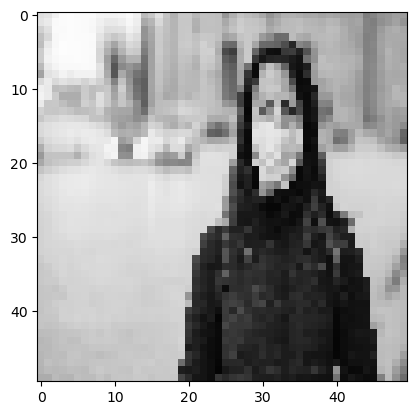

In [5]:
img_path = 'masked_person.jpg'

master_I= cv2.imread(img_path)
master_I = cv2.cvtColor(master_I,cv2.COLOR_BGR2RGB)
orig_image = cv2.cvtColor(master_I, cv2.COLOR_RGB2GRAY)
image = cv2.resize(orig_image,(50,50))
image = image.reshape((*image.shape,1)) # as tf.image.grayscale_to_rgb requires last dimension to be 1, see why reshape link
image = tf.convert_to_tensor(image)  # as tf.image.grayscale_to_rgb requires tensor for processing.
image = tf.image.grayscale_to_rgb(image).numpy()/255. # .numpy will convert dtype to numpy from tf
# we need to reshape image to [batch_size, row, col, channel] to feed it to model for prediction
final_image = image.reshape(1, *image.shape) #https://stackoverflow.com/questions/56874677/transform-3d-tensor-to-4d

plt.imshow(final_image[0],cmap='gray')

In [6]:
final_image[0].shape

(50, 50, 3)

In [7]:
model.predict(final_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


array([[0.1143156, 0.8856844]], dtype=float32)

In [8]:
is_mask = tf.math.argmax(model.predict(final_image),1).numpy()[0] # it gives the index value of maximum
is_mask

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


1

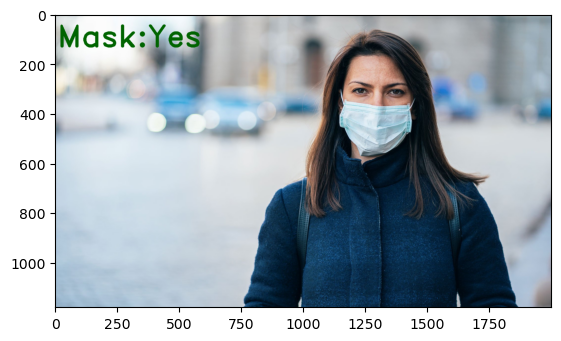

In [9]:
def mask(img):
    if is_mask:
        plt.imshow(cv2.putText(img,
                    'Mask:Yes', (10,130),
                    fontFace=cv2.FONT_HERSHEY_DUPLEX,
                    fontScale=4,
                    color=(0,100,0),thickness=7))
    else:
        plt.imshow(img)
        
mask(master_I)